In [1]:
import chess_engine
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=3, suppress=True)

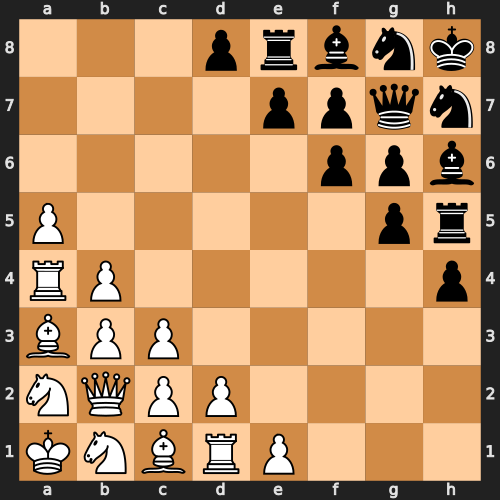

In [2]:
env = chess_engine.DiagonalChess()
env.reset()

env.render()

In [3]:
env.board

array([[ 0,  0,  0,  1,  2,  4,  3,  6],
       [ 0,  0,  0,  0,  1,  1,  5,  3],
       [ 0,  0,  0,  0,  0,  1,  1,  4],
       [-1,  0,  0,  0,  0,  0,  1,  2],
       [-2, -1,  0,  0,  0,  0,  0,  1],
       [-4, -1, -1,  0,  0,  0,  0,  0],
       [-3, -5, -1, -1,  0,  0,  0,  0],
       [-6, -3, -4, -2, -1,  0,  0,  0]], dtype=int8)

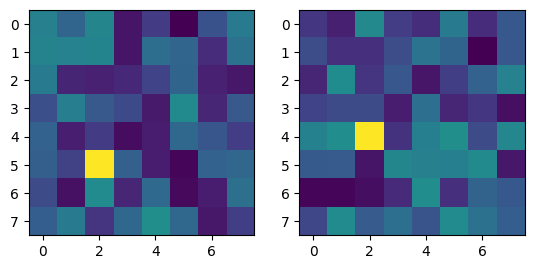

In [4]:
action = np.random.rand(8, 8, 2)*0.5
action[5,2,0] = 1
action[4,2,1] = 1
plt.subplot(1,2,1)
plt.imshow(action[:,:,0])
plt.subplot(1,2,2)
plt.imshow(action[:,:,1])

In [5]:
env = chess_engine.DiagonalChess()
env.reset()

print(env.isBlack)

obs, rew, done = env.step(0)

env.render()

False


TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1mUntyped global name 'make_a_move':[0m [1m[1mCannot determine Numba type of <class 'function'>[0m
[1m
File "chess_engine\diagchess.py", line 549:[0m
[1mdef make_move_from_action(board: np.ndarray, action: int, isBlack: bool) -> Tuple[bool, float]:
    <source elided>
    x1, y1, x2, y2 = int_action_to_move(action)
[1m    return make_a_move(board, x1, y1, x2, y2, isBlack)
[0m    [1m^[0m[0m
[0m

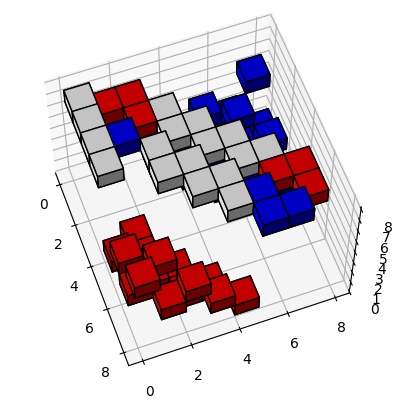

In [ ]:
# observation as 3d volume graph using plt

ax = plt.figure().add_subplot(projection='3d', proj_type='persp')
# negative as blue, positive as red
combined = np.zeros((8,8,8), dtype='object')
combined[obs != 0] = 'white'
combined[obs == -1] = 'blue'
combined[obs == 1] = 'red'
ax.voxels(obs, facecolors=combined, edgecolor='k')
ax.view_init(azim=-20, elev=60)
plt.show()

In [ ]:
env.reset()
np.set_printoptions(threshold=4096)

mask = chess_engine.internal.get_legal_moves_mask(env.board, env.isBlack)

# generate random floats of size 4096
action = np.random.rand(4096)

# apply mask
action = action * mask

# get index of max value
action = int(np.argmax(action))

# check if action is legal

obs, reward, done = env.step(action)

reward

: 

: 